In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('proposals_preprocess_0812_cleaned.xlsx')

# 1. Intro: Simple Statistics of Proposal Dataset

- Total rows: 20750
  - Before removing similar proposals: 20918

- Columns

In [2]:
df.shape, df.columns

((20750, 39),
 Index(['id', 'end', 'app', 'ipfs', 'type', 'body', 'link', 'title', 'start',
        'state', 'votes', 'author', 'symbol', 'quorum', 'scores', 'created',
        'updated', 'network', 'plugins', 'choices', 'privacy', 'flagged',
        'snapshot', 'strategies', 'validation', 'discussion', 'quorumType',
        '__typename', 'scores_state', 'scores_total', 'scores_updated',
        'scores_by_strategy', 'space_id', 'lang', 'Class A', 'Class B',
        'Class C', 'body_lower', 'title_lower'],
       dtype='object'))

### Columns Containing NaN Values

In [3]:
for c in df.columns[:-3]:
    x = df[c].isna().sum()
    if x > 0:
        print(c, x)

app 8707
symbol 4999
updated 20563
privacy 20119
discussion 13309
scores_state 9
Class A 20488
Class B 20519


### Columns That Are Nearly Empty

In [4]:
for c in ["plugins", "validation", "quorum"]:
    temp = df[c].value_counts() 
    print(c, temp.index[0], temp[0])
    print()

plugins {} 20428

validation {'params': {}} 20433

quorum 0.0 15931



### Sample data

In [5]:
df.iloc[100]

id                    0x89f4f8ea61c728fbb6e60fc97826fd955dbeb9e3e7d6...
end                                                 2023-06-27 20:46:00
app                                                            snapshot
ipfs                  bafkreidwgmggjxoxvlzhzy6fgxnzx3doxwifb3x6yzoug...
type                                                      single-choice
body                  Summary:\nThe proposal is to remove the old sd...
link                  https://snapshot.org/#/stakedao.eth/proposal/0...
title                 #SDGP 16 - Remove old sdTKN/TKN curve gauges f...
start                                               2023-06-22 20:46:51
state                                                            closed
votes                                                                22
author                       0x41717436744232Fb66E85fFAf388a8a33BC7397a
symbol                                                            veSDT
quorum                                                          

In [6]:
df.head()

,id,end,app,ipfs,type,body,link,title,start,state,...,scores_total,scores_updated,scores_by_strategy,space_id,lang,Class A,Class B,Class C,body_lower,title_lower
0,0xab8d72078b8146091ba0c28bb73d34263f7678f1a973...,2024-02-12 20:33:00,decentraland-governance,bafkreifcsoflgpysjp6hkhtkous64sextisaozfclojfq...,single-choice,"(AGA)\nShould the following $100,000 grant i...",https://snapshot.org/#/snapshot.dcl.eth/propos...,"""EmpathyVision"". Bridging Communities for peo...",2024-01-29 20:33:00,closed,...,1.680106e+07,1708004204,"[[0, 4000, 0, 3.805217354170137, 300, 0, 100, ...",snapshot.dcl.eth,en,NaN,NaN,NaN,aga \nshould the following 100 000 grant in t...,"""empathyvision"". bridging communities for peo..."
1,QmbyTP2pemJae9XbX8UNWEydhdTKw9xCFR7SFTKeowXizo,2021-09-30 08:45:00,NaN,QmbyTP2pemJae9XbX8UNWEydhdTKw9xCFR7SFTKeowXizo,single-choice,I've thought it would be interesting to use Ch...,https://snapshot.org/#/aavegotchi.eth/proposal...,"""Goodie Bags"" (Portals) for Wearables",2021-09-02 08:45:00,closed,...,5.034102e+06,1636757389,"[[1447799.037800684, 2283644, 55787.5905787104...",aavegotchi.eth,en,NaN,NaN,NaN,i ve thought it would be interesting to use ch...,"""goodie bags"" (portals) for wearables"
2,0x872bfadf89dee5dcea47992b94ebff05bd24dcf9a02d...,2023-06-09 20:50:46,snapshot,bafkreibhim56meukyl3gehpatuh75gmo3f4hanrcr5sxy...,basic,# TL;DR\n*Requesting 0.69 ETH commission and V...,https://snapshot.org/#/gnars.eth/proposal/0x87...,"""Pixel 189"" - a Gnars Pixelord Commission wort...",2023-06-06 20:50:46,closed,...,4.630000e+02,1686311455,"[[169, 207], [60, 19], [8, 0]]",gnars.eth,en,NaN,NaN,NaN,tl dr\n requesting 0 69 eth commission and vot...,"""pixel 189"" - a gnars pixelord commission wort..."
3,QmZZNMgwz2yAsmcSSZeqUqETNbp84KinkvPZpecv2Gx25w,2020-09-12 21:00:00,NaN,QmZZNMgwz2yAsmcSSZeqUqETNbp84KinkvPZpecv2Gx25w,single-choice,Dark mode is a must to have on any website in ...,https://snapshot.org/#/sushigov.eth/proposal/Q...,"""Seaweed mode"" (Dark mode)",2020-09-10 21:00:00,closed,...,1.332321e+03,1636667979,"[[1332.3211264507845], [0]]",sushigov.eth,en,NaN,NaN,NaN,dark mode is a must to have on any website in ...,"""seaweed mode"" (dark mode)"
4,0xe3acdc622e4a9dafe1d14cc8766b5c0c97fc47004746...,2024-06-09 18:04:57,snapshot,bafkreibih33eegb2blf3h7odyn7bvizy7symawvo3ofrb...,single-choice,Swapr proposes to deploy a SHU/USDC pool in Sw...,https://snapshot.org/#/shutterdao0x36.eth/prop...,"""Temp Check"" - Deploy a SHU/USDC Pool in Swapr...",2024-06-06 18:04:57,closed,...,3.544875e+07,1717923907,"[[29902617.138216257], [1086.95652173913], [55...",shutterdao0x36.eth,en,NaN,NaN,NaN,swapr proposes to deploy a shu usdc pool in sw...,"""temp check"" - deploy a shu/usdc pool in swapr..."


### Columns with Nearly Identical Values

In [7]:
for c in ["quorumType", "scores_state", "__typename", "state", "lang"]:
    print(df[c].value_counts())
    print()

# 단, privacy는 대부분 null 

default    20750
Name: quorumType, dtype: int64

final    20741
Name: scores_state, dtype: int64

Proposal    20750
Name: __typename, dtype: int64

closed    20750
Name: state, dtype: int64

en    20750
Name: lang, dtype: int64

shutter    631
Name: privacy, dtype: int64



### Count of Each Value in the Specified Column

In [8]:
df["author"].value_counts()

0x5E23D08324f017d5425e59A2782C9ae27aCE0958    1230
0xBB7B59Afa3A0E5Be143b8fE9C641F00c1ecB9d69    1071
0x724061efDFef4a421e8be05133ad24922D07b5Bf     322
0xc3d6f21c79C2567A1858d8b93a4EDBD9dB399d9d     315
0xFAD69Bd739c64cC8e3f1C3bb3B60fe4f160174Cc     294
                                              ... 
0xA7F63376169ccC087EB1160E62ceCcB146C1d555       1
0xB357E7575a780980E4ceE86654A6aCd0cC13b77f       1
0x7e9ec322bd8CDB9c0e8585B1EbEf8b85e2C17767       1
0x462D986C59f47599ae2884162C9b8d87b3FAAa6f       1
0x63009AE2Bad374C3aDACa32c220F704581363aF4       1
Name: author, Length: 3409, dtype: int64

In [9]:
df["author"].value_counts().describe()

count    3409.000000
mean        6.086829
std        32.697048
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1230.000000
Name: author, dtype: float64

In [10]:
df["scores"].value_counts()

[0, 0]                                                         28
[12, 0]                                                        13
[1090149.7629480332, 0, 2000342.6]                             12
[12, 0, 0]                                                     12
[895035.2139744707, 0, 2000342.6]                              11
                                                               ..
[97, 1439]                                                      1
[49, 1472]                                                      1
[2, 444, 0, 0]                                                  1
[1027, 12]                                                      1
[21551.668878425327, 5536832.137618381, 1113471.6192419045]     1
Name: scores, Length: 20354, dtype: int64

In [11]:
df["network"].value_counts()

1        15920
56        2299
137        897
42161      577
250        274
1088       244
1284       204
100        102
43114       79
592         50
2400        47
10          34
321         17
324          3
4            2
8453         1
Name: network, dtype: int64

In [12]:
df["choices"].str.lower().value_counts()

['for', 'against', 'abstain']                                                                3065
['yes', 'no']                                                                                3000
['for', 'against']                                                                           1646
['yes', 'no', 'abstain']                                                                     1239
['yae', 'nay', 'abstain']                                                                     401
                                                                                             ... 
['option 1', 'option 2 ', 'keep it as it is ']                                                  1
['yes, free my cake', 'no, i would rather pay bail.']                                           1
['stop the migration in two months', "don't stop the migration", "let's discuss further"]       1
['yes - approve grant request', 'no - do not approve']                                          1
['yes - lets do it',

In [13]:
df["strategies"].value_counts()

[{'network': '56', 'params': {'symbol': 'CAKE', 'address': '0x0E09FaBB73Bd3Ade0a17ECC321fD13a19e81cE82', 'decimals': 18}}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [14]:
df["scores_total"].value_counts()

1.200000e+01    51
1.300000e+01    46
1.100000e+01    43
1.000000e+01    42
1.400000e+01    42
                ..
1.334301e+08     1
1.277415e+08     1
1.084305e+08     1
6.387885e+07     1
6.671855e+06     1
Name: scores_total, Length: 19028, dtype: int64

In [15]:
df["scores_by_strategy"].value_counts()

[[0], [0]]                                                                                                                                                                                           28
[[12], [0]]                                                                                                                                                                                          13
[[761588.5729547191, 328561.1899933141], [0, 0], [2000099.23, 243.37]]                                                                                                                               12
[[12], [0], [0]]                                                                                                                                                                                     12
[[14], [0]]                                                                                                                                                                                          11


# 2. Proposal Counts for Each Space

### Proposal Counts for Each Space
- Total count
- Mean
- Standard Deviation
- Percentile

In [16]:
space_counts = df['space_id'].value_counts()
space_counts.describe()

count     245.000000
mean       84.693878
std       194.119365
min         1.000000
25%        22.000000
50%        38.000000
75%        78.000000
max      2301.000000
Name: space_id, dtype: float64

In [17]:
print("Spaces under 5 proposals:", space_counts[space_counts <= 5].shape)

print("Spaces under 10 proposals:", space_counts[space_counts <= 10].shape)
space_counts[space_counts <= 10]

Spaces under 5 proposals: (21,)
Spaces under 10 proposals: (28,)


poktdao.eth               10
concentratordao.eth        9
primexyz.eth               9
infinex.eth                8
paragonsdao.eth            7
btcismylove.eth            7
pnounsdao.eth              7
goopsnapshot.eth           5
web3-no1.eth               4
meiridi.eth                3
babyfive.eth               3
dorg.eth                   3
rusha.eth                  3
digitalriyal.eth           2
thehong.eth                2
fabien.eth                 2
insuretoken.eth            2
pozoaxel.eth               1
biteren.eth                1
haitang.eth                1
cuchorapido.eth            1
01meta.eth                 1
kwenta.eth                 1
apollodao.eth              1
signinhere.eth             1
defjnite.eth               1
xxx.freesubs.eth           1
lens.changliuchuan.eth     1
Name: space_id, dtype: int64

In [18]:
temp = space_counts[space_counts <= 2].index.tolist()

print("Spaces under 2 proposals:", len(temp))

df[df["space_id"].isin(temp)][["title", "body", "space_id"]].sort_values(by="space_id")

Spaces under 2 proposals: 15


,title,body,space_id
15429,Proposal - Make Polygon a Country,If no one is saying I got a Proposal For you: ...,01meta.eth
14900,Partnership & Mutual Grant with Gitcoin,Developer DAOs mission is to accelerate the ed...,apollodao.eth
10369,FROGAGA Lucky Box Airdrops,Upcoming trending NFT series! #FROGAGA Lucky B...,biteren.eth
16436,Propuesta para sueldo retroactivo de Stovedove,"User: Stovedove\nCantidad: 150,000\n75%: 112,5...",cuchorapido.eth
11279,Have you already done Tabi?,"According to developers, the funds will be pri...",defjnite.eth
12785,Launch quests | $ZK,Perform simple tasks and wait for drop $ZK tok...,digitalriyal.eth
19480,Topaz Aptos AIRDR0P APT,The long-awaited drop from Topaz.\nTo particip...,digitalriyal.eth
19308,This is a long title this is a long title this...,This is a long title this is a long title this...,fabien.eth
18665,Snapshot Hackathon #1,Weight rank the projects you like\n*\n# Treasu...,fabien.eth
3779,[Phase 2] HIP-54: Airdrop to Democratic Heroes,Modify the term of office of the elected Missi...,haitang.eth


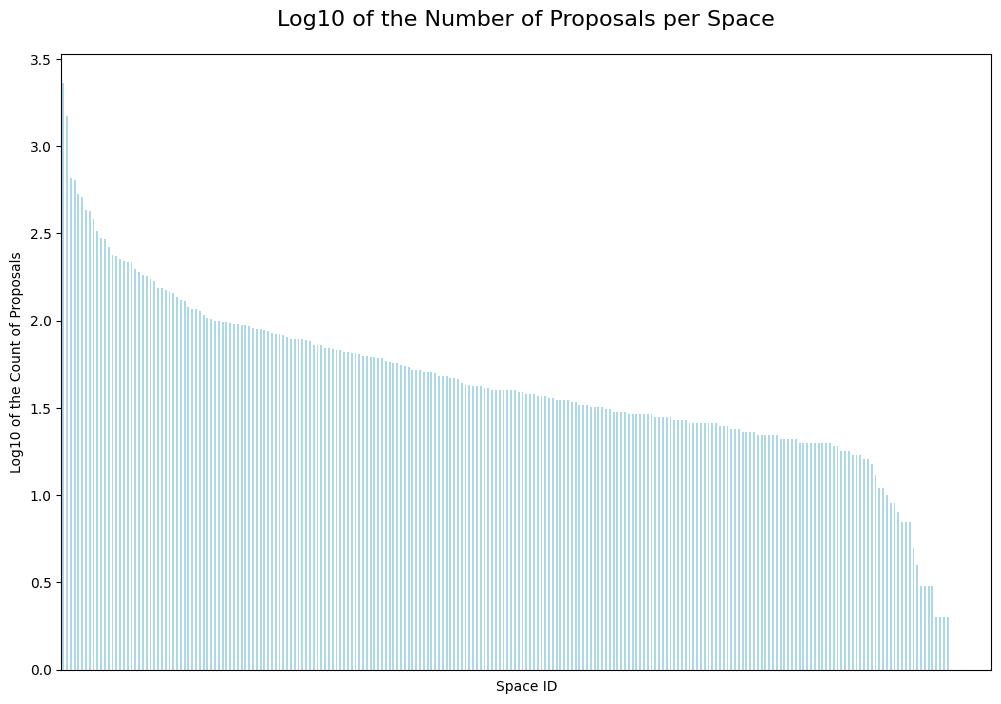

In [19]:
log_space_counts = np.log10(space_counts)

plt.figure(figsize=(12, 8))
log_space_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Space ID')
plt.ylabel('Log10 of the Count of Proposals')
plt.title('Log10 of the Number of Proposals per Space',
          pad=20, fontsize=16)
plt.xticks([], [])  # Remove x-axis ticks
plt.show()

### Number of Followers, Proposals, and Votes for Each Space 
- Proposal count and vote count in this section are the number ***before preprocessing deletion***

(245, 47)


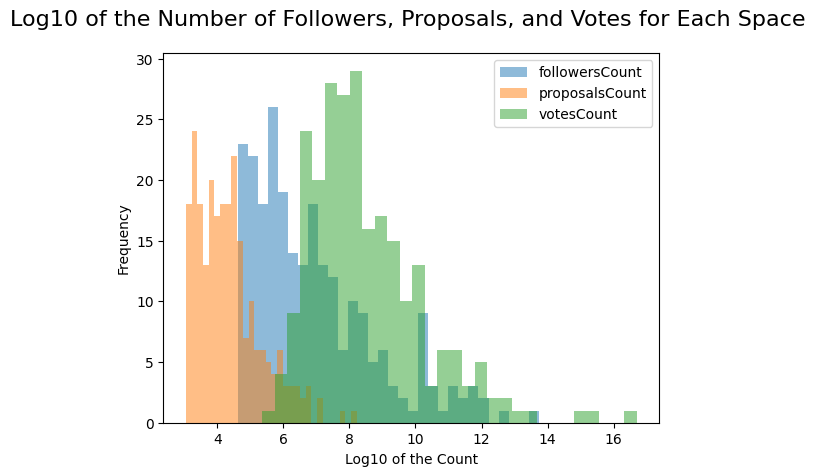

In [20]:
df_space = pd.read_excel('spaces_cut.xlsx')
df_space = df_space[df_space['id'].isin(space_counts.index)]
print(df_space.shape)

plt.hist(df_space['followersCount'].apply(np.log), label="followersCount", alpha=0.5, bins=30)
plt.hist(df_space['proposalsCount'].apply(np.log), label="proposalsCount", alpha=0.5, bins=30)
plt.hist(df_space['votesCount'].apply(np.log), label="votesCount", alpha=0.5, bins=30)
plt.xlabel('Log10 of the Count')
plt.ylabel('Frequency')
plt.title('Log10 of the Number of Followers, Proposals, and Votes for Each Space ',
          pad=20, fontsize=16)
plt.legend()

In [21]:
df_space[['followersCount', 'proposalsCount', 'votesCount']].describe()

,followersCount,proposalsCount,votesCount
count,245.000000,245.000000,2.450000e+02
mean,12399.938776,152.853061,1.293534e+05
std,65209.787856,333.606993,1.209157e+06
min,102.000000,21.000000,2.130000e+02
25%,243.000000,36.000000,1.501000e+03
50%,652.000000,66.000000,3.471000e+03
75%,2797.000000,119.000000,1.224000e+04
max,917335.000000,3725.000000,1.794336e+07


# 3. Total votes by spaces

### Aggregate Vote Counts per Space

In [22]:
space_votes = df.groupby('space_id')['votes'].sum()
space_votes.describe() / 100 # divide by 100 due to the large numbers

count         2.450000
mean       1262.595306
std       11997.815061
min           0.120000
25%           8.360000
50%          27.100000
75%         110.720000
max      177959.240000
Name: votes, dtype: float64

In [23]:
space_votes.sort_values(ascending=False).head(10)

space_id
stgdao.eth                17795924
arbitrumfoundation.eth     5289055
aave.eth                   3103339
cakevote.eth                431105
aavegotchi.eth              396567
gmx.eth                     305324
uniswapgovernance.eth       275334
metislayer2.eth             242481
speraxdao.eth               202107
gitcoindao.eth              180367
Name: votes, dtype: int64

### Rankings: Top 5 and Bottom 5 by Total Votes

In [24]:
space_votes_rank = space_votes.rank(method='first', ascending=False).astype(int).sort_values(ascending=True)
print("<Top 5>")
print(space_votes_rank[:5])
print()
print("<Bottom 5>")
print(space_votes_rank[-5:])

<Top 5>
space_id
stgdao.eth                1
arbitrumfoundation.eth    2
aave.eth                  3
cakevote.eth              4
aavegotchi.eth            5
Name: votes, dtype: int32

<Bottom 5>
space_id
insuretoken.eth     241
thehong.eth         242
xxx.freesubs.eth    243
haitang.eth         244
01meta.eth          245
Name: votes, dtype: int32


# 4. Proposal Dates

### Number of Proposals per Month - ["start", "end", "created"]
- start: proposal start date
- end: proposal end date
- created: proposal created date

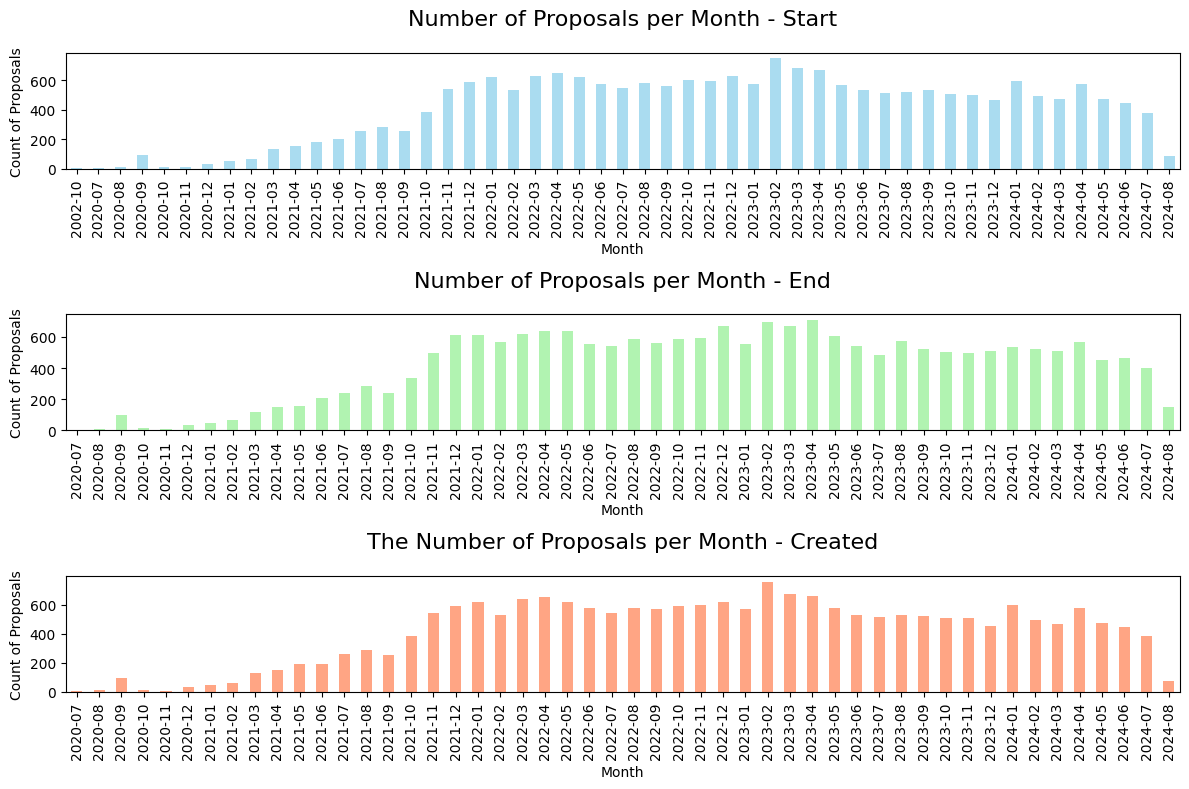

In [25]:
# First, convert the 'start' column to datetime if it's not already
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['created'] = pd.to_datetime(df['created'])

# Extract the month and year from the 'start' column
df['year_month_start'] = df['start'].dt.to_period('M')
df['year_month_end'] = df['end'].dt.to_period('M')
df['year_month_created'] = df['created'].dt.to_period('M')

# Now count the number of occurrences per month
monthly_counts_start = df['year_month_start'].value_counts().sort_index()
monthly_counts_end = df['year_month_end'].value_counts().sort_index()
monthly_counts_created = df['year_month_created'].value_counts().sort_index()

# Plotting the histogram with less crowded x-axis labels
plt.figure(figsize=(12, 8))

# First subplot for 'start'
plt.subplot(3, 1, 1)
monthly_counts_start.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - Start', pad=20, fontsize=16)

# Second subplot for 'end'
plt.subplot(3, 1, 2)
monthly_counts_end.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - End', pad=20, fontsize=16)

# Third subplot for 'created'
plt.subplot(3, 1, 3)
monthly_counts_created.plot(kind='bar', color='coral', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('The Number of Proposals per Month - Created', pad=20, fontsize=16)

plt.tight_layout()
plt.show()

### Duration of Proposal 
- Unit: Hour

In [26]:
# Calculate the duration for each proposal
df['duration'] = (df['end'] - df['start']).dt.total_seconds() / 3600  # Convert to hours
df["duration"].describe()

count     20750.000000
mean        185.366363
std        1365.633264
min           0.359722
25%          72.000000
50%          96.397778
75%         168.000000
max      176653.250000
Name: duration, dtype: float64

Remove the top and bottom 5% of the duration values

In [27]:
top = df["duration"].quantile(0.95)
bottom = df["duration"].quantile(0.05)
simple_duration = df[(df["duration"] > bottom) & (df["duration"] < top)]["duration"]
simple_duration.describe()

count    18195.000000
mean       112.778851
std         52.563157
min         37.498611
25%         72.000000
50%         96.000000
75%        167.960694
max        335.995833
Name: duration, dtype: float64

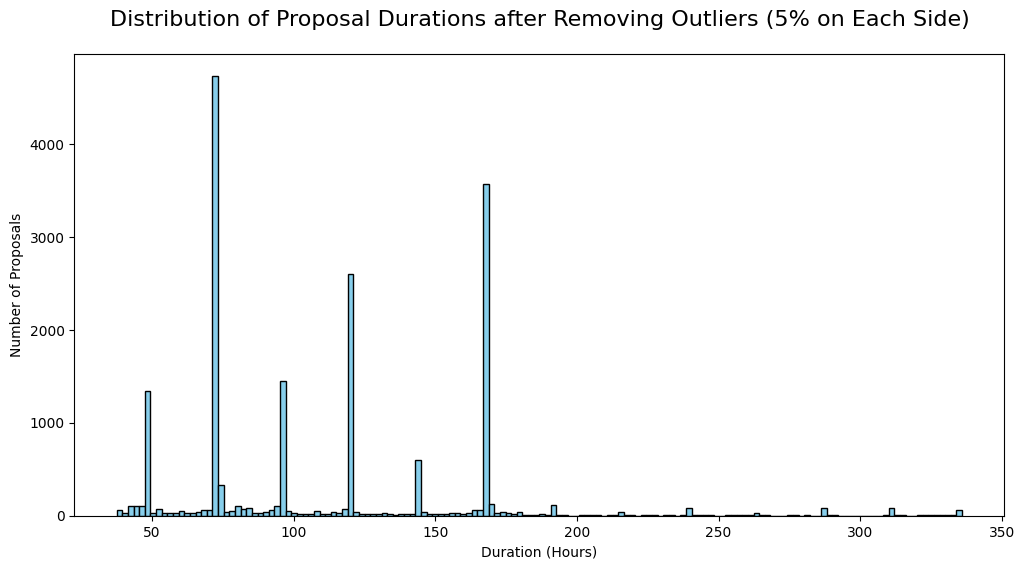

In [28]:
plt.figure(figsize=(12, 6))
plt.hist(simple_duration, bins=150, color='skyblue', edgecolor='black',)
plt.xlabel('Duration (Hours)')
plt.ylabel('Number of Proposals')
plt.title('Distribution of Proposal Durations after Removing Outliers (5% on Each Side)',
            pad=20, fontsize=16)
plt.show()